In [234]:
!pip install category_encoders

#### Importação das bibliotecas

In [235]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [236]:
#Importação do DF
df = pd.read_csv('dataset.csv')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


#### Criação de nulos e remoção dos mesmos


In [237]:
# Criando um DataFrame com dados nulos
num_linhas_nulas = 5  # Número de linhas com valores nulos que você deseja adicionar
linhas_nulas = pd.DataFrame({
    'track_genre': [np.nan] * num_linhas_nulas,
    'popularity': [np.nan] * num_linhas_nulas
})

In [238]:
#Adicionando os nulos no df
df_com_nulos = pd.concat([df, linhas_nulas], ignore_index=True)

print(df_com_nulos)

        Unnamed: 0                track_id                 artists  \
0              0.0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1              1.0  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2              2.0  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3              3.0  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4              4.0  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
114000         NaN                     NaN                     NaN   
114001         NaN                     NaN                     NaN   
114002         NaN                     NaN                     NaN   
114003         NaN                     NaN                     NaN   
114004         NaN                     NaN                     NaN   

                                               album_name  \
0                                                  Comedy   
1                                    

In [239]:
#Verificando valores nulos:
display(df_com_nulos.isnull().sum())

Unnamed: 0          5
track_id            5
artists             6
album_name          6
track_name          6
popularity          5
duration_ms         5
explicit            5
danceability        5
energy              5
key                 5
loudness            5
mode                5
speechiness         5
acousticness        5
instrumentalness    5
liveness            5
valence             5
tempo               5
time_signature      5
track_genre         5
dtype: int64

In [240]:
#Dropagem de linhas com valores nulos
df1 = df_com_nulos.dropna()
df1.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

#### Dropagem das colunas desncessárias

In [241]:
#Dropagem de colunas que a princípio não serão necessárias
df1 = df1.drop(columns=['Unnamed: 0', 'track_id', 'key', 'artists', 'album_name'])
df1

,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Comedy,73.0,230666.0,False,0.676,0.4610,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4.0,acoustic
1,Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4.0,acoustic
2,To Begin Again,57.0,210826.0,False,0.438,0.3590,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4.0,acoustic
3,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3.0,acoustic
4,Hold On,82.0,198853.0,False,0.618,0.4430,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4.0,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Sleep My Little Boy,21.0,384999.0,False,0.172,0.2350,-16.393,1.0,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5.0,world-music
113996,Water Into Light,22.0,385000.0,False,0.174,0.1170,-18.318,0.0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4.0,world-music
113997,Miss Perfumado,22.0,271466.0,False,0.629,0.3290,-10.895,0.0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4.0,world-music
113998,Friends,41.0,283893.0,False,0.587,0.5060,-10.889,1.0,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4.0,world-music


#### Exclussão de gêneros desnecessários


In [242]:
# Removendo os gêneros "world-music" e "sleep"
#Por que? No data set o gênero world-music só tinha o nome da música e não o pais.
#O sleep removemos por que estava causando outliers e não há anecessidade de manter sleep na playlist
# Removemos os gêneros dos países, deixando apenas: Brazil, Latino e Espanha, pois achamos mais adequado para o contexto que o modelo será usado
dados_incosistentes = ['british', 'german', 'indian', 'iranian', 'malay', 'swedish', 'turkish', 'world-music', 'sleep']
df1 = df1[~((df1['track_genre'].isin(dados_incosistentes)) )]

# Verificando se os gêneros foram removidos
print(df1['track_genre'].unique())

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'cantopop'
 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy' 'country'
 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno' 'disco'
 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro' 'electronic'
 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'gospel' 'goth' 'grindcore'
 'groove' 'grunge' 'guitar' 'happy' 'hard-rock' 'hardcore' 'hardstyle'
 'heavy-metal' 'hip-hop' 'honky-tonk' 'house' 'idm' 'indie-pop' 'indie'
 'industrial' 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids'
 'latin' 'latino' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show-tunes' 'singer-songwriter' 'ska' 'songwriter'


#### Remoção de valores duplicados

In [243]:
# Dicionário para armazenar o número de duplicatas por coluna
duplicatas_por_coluna = {}

# Itera sobre as colunas do DataFrame
for coluna in df1.columns:
    # Conta as duplicatas na coluna atual
    num_duplicatas = df1.duplicated(subset=[coluna], keep=False).sum()

    # Armazena o número de duplicatas no dicionário
    duplicatas_por_coluna[coluna] = num_duplicatas

# Exibe o número de duplicatas por coluna
for coluna, num_duplicatas in duplicatas_por_coluna.items():
    print(f"Coluna '{coluna}': {num_duplicatas} duplicatas")
#Todas essa duplicadas são necessárias para o dataframe, pois fazem part existem músicas diversas do mesmo artista e com os mesmos parâmetros

Coluna 'track_name': 54104 duplicatas
Coluna 'popularity': 104998 duplicatas
Coluna 'duration_ms': 77341 duplicatas
Coluna 'explicit': 104999 duplicatas
Coluna 'danceability': 104880 duplicatas
Coluna 'energy': 104672 duplicatas
Coluna 'loudness': 100242 duplicatas
Coluna 'mode': 104999 duplicatas
Coluna 'speechiness': 104890 duplicatas
Coluna 'acousticness': 104519 duplicatas
Coluna 'instrumentalness': 104824 duplicatas
Coluna 'liveness': 104947 duplicatas
Coluna 'valence': 104960 duplicatas
Coluna 'tempo': 81424 duplicatas
Coluna 'time_signature': 104999 duplicatas
Coluna 'track_genre': 104999 duplicatas


In [244]:
df1 = df1.drop_duplicates(subset='track_name')

# Dicionário para armazenar o número de duplicatas por coluna
duplicatas_por_coluna = {}

# Itera sobre as colunas do DataFrame
for coluna in df1.columns:
    # Conta as duplicatas na coluna atual
    num_duplicatas = df1.duplicated(subset=[coluna], keep=False).sum()

    # Armazena o número de duplicatas no dicionário
    duplicatas_por_coluna[coluna] = num_duplicatas

# Exibe o número de duplicatas por coluna
for coluna, num_duplicatas in duplicatas_por_coluna.items():
    print(f"Coluna '{coluna}': {num_duplicatas} duplicatas")
#Todas essa duplicadas são necessárias para o dataframe, pois fazem part existem músicas diversas do mesmo artista e com os mesmos parâmetros

Coluna 'track_name': 0 duplicatas
Coluna 'popularity': 67481 duplicatas
Coluna 'duration_ms': 35685 duplicatas
Coluna 'explicit': 67485 duplicatas
Coluna 'danceability': 67358 duplicatas
Coluna 'energy': 67073 duplicatas
Coluna 'loudness': 61836 duplicatas
Coluna 'mode': 67485 duplicatas
Coluna 'speechiness': 67356 duplicatas
Coluna 'acousticness': 66870 duplicatas
Coluna 'instrumentalness': 67171 duplicatas
Coluna 'liveness': 67415 duplicatas
Coluna 'valence': 67441 duplicatas
Coluna 'tempo': 40431 duplicatas
Coluna 'time_signature': 67485 duplicatas
Coluna 'track_genre': 67485 duplicatas


#### Verificando valores inconsistentes  nas colunas 


In [245]:
#Procura valores não numéricos em colunas numéricas
#não encontrado valores não numéricos nas colunas: popularity, duration_ms, danceability, energy, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature.
coluna = 'time_signature'
print(df1[~df1[coluna].apply(lambda x: isinstance(x, (int, float)))])

Empty DataFrame
Columns: [track_name, popularity, duration_ms, explicit, danceability, energy, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []


#### Verificação e remoção de Oulliers

In [246]:
#Verificação de outliers
#Função para filtrar outliers com base no desvio padrão
grouped = df1.groupby(['track_genre'])

def remove_outliers(group):
	#Calcula a média e o desvio padrão da duração das músicas em segundos.
	media_duration = group['duration_ms'].mean()
	desvio_duration = group['duration_ms'].std()
	#Define limiar superior e inferior para outliers
	limiar_superior = media_duration + 0.5 * desvio_duration
	limiar_inferior =  media_duration - 0.5 * desvio_duration

	limiar_superior = max(limiar_superior, 9000)
	limiar_inferior = min(limiar_inferior, 600)

	return group[(group['duration_ms'] >= limiar_inferior) & (group['duration_ms'] <= limiar_superior)]

#Aplicando função
df1_reduzido = grouped.apply(remove_outliers, include_groups=True).reset_index(drop=True)

print(f"Antes: {len(df1)} músicas no dataset (original)")
print(f"Depois {len(df1_reduzido)} músicas no dataset (sem outliers)")
df1 = df1_reduzido

Antes: 67485 músicas no dataset (original)
Depois 52296 músicas no dataset (sem outliers)


C:\Users\JP\AppData\Local\Temp\ipykernel_15852\4083659280.py:19: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



#### Criação de Colunas duration_minutes e duration_seconds

In [247]:
df1 = df1.copy()
#duração esta em milissegundos:
df1['duration_minutes'] = (df1['duration_ms'] // 60000).astype(int)  # Minutos
df1['duration_seconds'] = ((df1['duration_ms'] % 60000) // 1000).astype(int)  # Segundos

# Criando uma nova coluna no formato "mm:ss":
df1['formatted_duration'] = df1['duration_minutes'].astype(str) + ':' + \
    df1['duration_seconds'].apply(lambda x: f"{x:02}")  # Formata segundos com dois dígitos

# Exibindo as primeiras linhas para verificar o resultado:
print(df1[['duration_ms', 'formatted_duration']].head())


   duration_ms formatted_duration
0     230666.0               3:50
1     149610.0               2:29
2     210826.0               3:30
3     201933.0               3:21
4     198853.0               3:18


In [248]:
df1.describe()

,popularity,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_minutes,duration_seconds
count,52296.000000,52296.000000,52296.000000,52296.000000,52296.000000,52296.000000,52296.000000,52296.000000,52296.000000,52296.000000,52296.000000,52296.000000,52296.000000,52296.000000,52296.000000
mean,34.546237,201783.311362,0.575410,0.647695,-8.255927,0.635727,0.093459,0.327330,0.175860,0.219406,0.495814,123.045562,3.909305,2.865802,29.359052
std,19.263638,65200.216801,0.169512,0.257050,4.975895,0.481230,0.121843,0.340897,0.324817,0.194686,0.260153,29.729699,0.419818,1.123727,17.281350
min,0.000000,17453.000000,0.000000,0.000073,-43.957000,0.000000,0.000000,0.000000,0.000000,0.009860,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,162216.250000,0.466000,0.468000,-10.166000,0.000000,0.036800,0.014000,0.000000,0.098900,0.281750,99.991750,4.000000,2.000000,15.000000
50%,34.000000,198649.000000,0.588000,0.694000,-7.036000,1.000000,0.051100,0.184000,0.000064,0.135000,0.491000,122.960500,4.000000,3.000000,29.000000
75%,49.000000,235561.750000,0.701000,0.869000,-4.961000,1.000000,0.092600,0.629000,0.111000,0.286000,0.707000,141.007000,4.000000,3.000000,44.000000
max,100.000000,505577.000000,0.985000,1.000000,4.532000,1.000000,0.965000,0.996000,0.999000,0.995000,0.995000,243.372000,5.000000,8.000000,59.000000


#### Tirando alguns insights

In [249]:
#Relações de algumas colunas com popularidade
#Relação "dançabilidade" das músicas
#Filtrar apenas as músicas com dançabilidade maior ou igual a 0.8

# Lista dos gêneros desejados
generos_dancaveis = ['trip-hop', 'kids', 'minimal-techno']

# Filtrar e agrupar os dados
musica = df1[df1['track_genre'].isin(generos_dancaveis) & (df1['danceability'] >= 0.8)]
musica_grouped = musica.groupby('track_genre').size().reset_index(name='danceability')

# Ordenar os gêneros pela quantidade de músicas dançáveis
musica_sorted = musica_grouped.sort_values(by='danceability', ascending=False)

fig = px.bar(
    musica_sorted,
    x='track_genre',
    y='danceability',
    color='track_genre',
    color_discrete_sequence=['#A020F0', '#8A2BE2', '#4B0082', '#EE82EE', '#9932CC'],
    title='Gêneros com mais músicas dançáveis',
    labels={'track_genre': 'Gênero', 'danceability': 'Quantidade'},
    text='danceability'
   
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='inside') 
fig.show()



#### Popularidade e "dançabilidade": Observamos que as músicas mais populares nem sempre são as mais "dançáveis". A maioria das músicas populares apresenta uma pontuação de "dançabilidade" entre 0.5 e 0.7.



In [250]:
#Relação de valencia 
def contar_tristes_e_felizes(df1):
    # Filtro para músicas tristes (variance entre 0 e 0.5)
    df_tristes = df1[(df1['valence'] >= 0) & (df1['valence'] <= 0.5)]
    # Filtro para músicas felizes (variance entre 0.6 e 1)
    df_felizes = df1[(df1['valence'] > 0.5) & (df1['valence'] <= 1)]
    
    # Contabilizando o número de músicas tristes e felizes por gênero
    tristes_por_genero = df_tristes.groupby('track_genre').size().reset_index(name='tristes')
    felizes_por_genero = df_felizes.groupby('track_genre').size().reset_index(name='felizes')
    
    # Mescla os dois DataFrames para obter os dois contadores juntos por gênero
    result = pd.merge(tristes_por_genero, felizes_por_genero, on='track_genre', how='outer').fillna(0)
    result_sorted_tristes = result.sort_values(by='tristes', ascending=False).reset_index(drop=True)
    result_sorted_felizes = result_sorted_tristes.sort_values(by='felizes', ascending=False).reset_index(drop=True)
    
    return  result_sorted_felizes
    #return  result_sorted_tristes
# Chamada da função
result = contar_tristes_e_felizes(df1)

# Exibe o resultado
#Mais felizes
genero_feliz = ['forro', 'salsa', 'afrobeat']
valores_em_ordem = result.sort_values(by='felizes',ascending=False)
mais_felizes = valores_em_ordem[valores_em_ordem['track_genre'].isin(genero_feliz)]
fig1 = px.bar(
    mais_felizes,
    x='track_genre',
    y='felizes',
    color='track_genre',
    labels = {'track_genre':'Gênero'},
    text='felizes',
    color_discrete_sequence=['#A020F0', '#8A2BE2', '#4B0082', '#EE82EE', '#9932CC']
)

fig1.update_traces(texttemplate='%{text:.2s}', textposition='inside')  # Configurações de exibição
fig1.show()

genero_triste = ['black-metal', 'ambient', 'grindcore']
valores_em_ordem_T = result.sort_values(by='tristes',ascending=False)
mais_tristes = valores_em_ordem_T[valores_em_ordem_T['track_genre'].isin(genero_triste)]
fig2 = px.bar(
    mais_tristes,
    x='track_genre',
    y='tristes',
    color ='track_genre',
    labels = {'track_genre':'Gênero'},
    text='tristes',
    color_discrete_sequence=['#A020F0', '#8A2BE2', '#4B0082', '#EE82EE', '#9932CC']
)

fig2.update_traces(texttemplate='%{text:.2s}', textposition='inside')  # Configurações de exibição
fig2.show()

#### Tristeza e felicidade por gênero: Analisando os gêneros musicais, percebemos que as músicas mais tristes pertencem ao black-metal, ambient e grindcore. Por outro lado, os gêneros mais alegres são forró, salsa e afrobeat. Isso reflete uma tendência: músicas melancólicas, como as ambientais ou com letras pesadas, realmente transmitem maior tristeza, enquanto gêneros como forró e salsa são naturalmente mais dançantes e felizes.

In [251]:
# Agrupar os dados por 'track_genre' e calcular a média da duração das músicas
grupo_por_genero = df1.groupby('track_genre')['duration_ms'].mean().reset_index()

# Ordenar por duração média em ordem decrescente e pegar os 3 gêneros com maior duração
top_3_generos = grupo_por_genero.sort_values(by='duration_ms', ascending=False).head(3)

# Verificar as 3 primeiras entradas (os gêneros com maior duração média)
print(top_3_generos)

# Criar o gráfico de barras com Plotly, apenas com os 3 gêneros
fig = px.bar(top_3_generos, 
             x='track_genre', 
             y='duration_ms', 
             title='Top 3 Gêneros com as Músicas de Maior Duração Média',
             labels={'track_genre': 'Gênero', 'duration_ms': 'Duração Média (ms)'},
             color='track_genre',  # Colorir barras com base no gênero
             color_discrete_sequence=['#800080', '#8A2BE2', '#9370DB'])

# Exibir o gráfico
fig.show()


       track_genre    duration_ms
68  minimal-techno  349906.084320
23  detroit-techno  331466.994602
12   chicago-house  330231.582017


#### Preferência por músicas curtas: Observa-se que o público prefere músicas mais curtas, especialmente em gêneros como hip-hop, latino, dance, e outros voltados ao pop e música eletrônica. Esses estilos, geralmente mais curtos e dinâmicos, são amplamente preferidos.

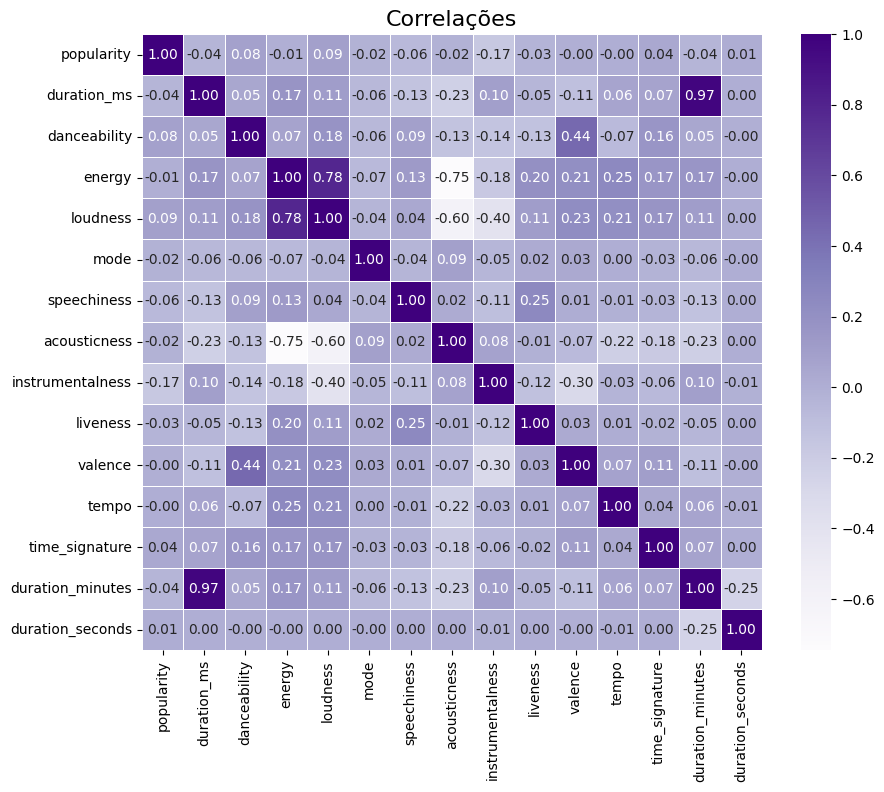

In [252]:
#Gráfico de correlação
# pego apenas colunas numéricas
numeric_columns = df1.select_dtypes(include=['number'])

# Calcula a matriz de correlação
correlation_matrix = numeric_columns.corr()


# Cria o mapa de calor

plt.figure(figsize=(10, 8))  # Tamanho do gráfico
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='Purples',  # Altere o colormap aqui
    fmt='.2f', 
    linewidths=0.5
)
plt.title('Correlações', fontsize=16)
plt.show()


#### Energia e Loudness: Músicas com alta energia tendem a ter um volume mais alto.
#### Danceability e Valence: Músicas com alta danceability geralmente são mais positivas e alegres.
#### Acousticness e Energy: Músicas acústicas tendem a ter menor energia.
#### Acousticness e Loudness: Músicas acústicas geralmente são menos altas.



In [253]:
#Gêneros mais populares
most_pop_genrer = ['pop-film', 'chill', 'k-pop', 'anime', 'brazil']
most_pop = df1[df1['track_genre'].isin(most_pop_genrer)]
#pega  a música mais popular de cada gênero
top_tracks = most_pop.loc[most_pop.groupby('track_genre')['popularity'].idxmax()]
fig = px.histogram(
    most_pop,
    x='track_genre',
    y='popularity',
    color = 'track_genre',
    title = '5 Gêneros mais populares',
    labels={'track_genre':'Gênero', 'popularity':'Popularidade'},
    color_discrete_sequence=['#A020F0', '#8A2BE2', '#4B0082', '#EE82EE', '#9932CC']
)
fig.show()
print(top_tracks)

                                 track_name  popularity  duration_ms explicit  \
2855                              KICK BACK        83.0     193495.0    False   
5501                         Move Your Body        82.0     157444.0    False   
9127                                   NVMD        79.0     181224.0     True   
33517                            After LIKE        88.0     176973.0    False   
40426  Thenmozhi (From "Thiruchitrambalam")        79.0     173225.0    False   

       danceability  energy  loudness  mode  speechiness  acousticness  \
2855          0.577   0.941    -5.170   1.0       0.1050       0.00207   
5501          0.848   0.821    -5.408   0.0       0.0527       0.01690   
9127          0.758   0.674    -4.533   1.0       0.1080       0.09030   
33517         0.680   0.922    -1.215   1.0       0.1210       0.10300   
40426         0.764   0.532    -5.979   0.0       0.0491       0.59800   

       instrumentalness  liveness  valence    tempo  time_signature 

In [254]:
# Dataframe tratado df1

### Análise descritiva estatísticas dos dados: 
##### Tipos de análise: Média, Mediana, Moda, Desvio-padrão

In [255]:
# Filtrando apenas as colunas numéricas
df_numerico = df1.select_dtypes(include=['number'])#Isso seleciona apenas as colunas do DataFrame que contêm dados numéricos

# Calculando as estatísticas para as colunas numéricas
moda = df1.mode().iloc[0]  # Moda de cada coluna (pegamos a primeira moda)
desvio_padrao = df_numerico.std()  # Desvio-padrão de cada coluna

# Criando um DataFrame com as estatísticas calculadas
estatisticas = pd.DataFrame({
    'Moda': moda,
    'Desvio-padrão': desvio_padrao
})
estatisticas

,Moda,Desvio-padrão
acousticness,0.995,0.340897
danceability,0.598,0.169512
duration_minutes,3.0,1.123727
duration_ms,192000.0,65200.216801
duration_seconds,0.0,17.281350
energy,0.977,0.257050
explicit,False,NaN
formatted_duration,3:32,NaN
instrumentalness,0.0,0.324817
liveness,0.109,0.194686


### Features relevantes 
##### Tipos de features: energy, loudness, intensidade, tempo, velocidade

In [256]:
df1['loudness'] = df1['loudness'].apply(lambda x: max(x, 1))  # Ajusta loudness para no mínimo 1

def calcular_intensidade(energy, loudness):
    # Garantindo que loudness seja positivo dentro da função (por segurança)
    if loudness <= 0:
        loudness = 1
    
    # Calculando a intensidade
    intensidade = energy * np.log(loudness + 1)
    
    # Escalando e ajustando a faixa
    intensidade *= 100
    intensidade = np.clip(intensidade, 0, 200)
    
    return round(intensidade)

# Aplicando a função calcular_intensidade ao DataFrame
df1['intensidade'] = df1.apply(lambda row: calcular_intensidade(row['energy'], row['loudness']), axis=1)

# Função para classificar a velocidade
def classificar_velocidade(bpm):
    if bpm <= 90:
        return 'Lento'
    elif bpm <= 150:
        return 'Moderado'
    elif bpm <= 200:
        return 'Rápido'
    else:
        return 'Desconhecido'

# Aplicando a classificação de velocidade
df1.loc[:, 'velocidade'] = df1['tempo'].apply(classificar_velocidade)


In [257]:
# Novas features
(df1[['energy', 'loudness', 'intensidade', 'tempo', 'velocidade']].head())

,energy,loudness,intensidade,tempo,velocidade
0,0.4610,1.0,32,87.917,Lento
1,0.1660,1.0,12,77.489,Lento
2,0.3590,1.0,25,76.332,Lento
3,0.0596,1.0,4,181.740,Rápido
4,0.4430,1.0,31,119.949,Moderado


### Transformar variáveis categóricas em numéricas
##### Tipo: Nominais

In [258]:
# Exibe informações sobre o DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52296 entries, 0 to 52295
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_name          52296 non-null  object 
 1   popularity          52296 non-null  float64
 2   duration_ms         52296 non-null  float64
 3   explicit            52296 non-null  object 
 4   danceability        52296 non-null  float64
 5   energy              52296 non-null  float64
 6   loudness            52296 non-null  float64
 7   mode                52296 non-null  float64
 8   speechiness         52296 non-null  float64
 9   acousticness        52296 non-null  float64
 10  instrumentalness    52296 non-null  float64
 11  liveness            52296 non-null  float64
 12  valence             52296 non-null  float64
 13  tempo               52296 non-null  float64
 14  time_signature      52296 non-null  float64
 15  track_genre         52296 non-null  object 
 16  dura

In [259]:
# Exibindo colunas que são do tipo String
df1.select_dtypes(include='object')

,track_name,explicit,track_genre,formatted_duration,velocidade
0,Comedy,False,acoustic,3:50,Lento
1,Ghost - Acoustic,False,acoustic,2:29,Lento
2,To Begin Again,False,acoustic,3:30,Lento
3,Can't Help Falling In Love,False,acoustic,3:21,Rápido
4,Hold On,False,acoustic,3:18,Moderado
...,...,...,...,...,...
52291,Trim Body,True,trip-hop,3:35,Moderado
52292,My Head Is My Only House Unless It Rains - 201...,False,trip-hop,2:58,Moderado
52293,From The Dark,False,trip-hop,3:22,Rápido
52294,Emerald Tuesday,False,trip-hop,3:19,Moderado


In [260]:
# Transforma variaveis categoricas em numericas usando OneHotEnconder
from category_encoders.one_hot import OneHotEncoder, OrdinalEncoder

one_hot = OneHotEncoder(cols=['track_genre'])
df1 = one_hot.fit_transform(df1)
df1.head()

,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,...,track_genre_100,track_genre_101,track_genre_102,track_genre_103,track_genre_104,duration_minutes,duration_seconds,formatted_duration,intensidade,velocidade
0,Comedy,73.0,230666.0,False,0.676,0.4610,1.0,0.0,0.1430,0.0322,...,0,0,0,0,0,3,50,3:50,32,Lento
1,Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,1.0,1.0,0.0763,0.9240,...,0,0,0,0,0,2,29,2:29,12,Lento
2,To Begin Again,57.0,210826.0,False,0.438,0.3590,1.0,1.0,0.0557,0.2100,...,0,0,0,0,0,3,30,3:30,25,Lento
3,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,1.0,1.0,0.0363,0.9050,...,0,0,0,0,0,3,21,3:21,4,Rápido
4,Hold On,82.0,198853.0,False,0.618,0.4430,1.0,1.0,0.0526,0.4690,...,0,0,0,0,0,3,18,3:18,31,Moderado


In [261]:
# Tranforma variáveis categóricas em númericas com OrdinalEconder

ord_enc = OrdinalEncoder(cols=['velocidade'])
df1 = ord_enc.fit_transform(df1)
df1.head()

,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,...,track_genre_100,track_genre_101,track_genre_102,track_genre_103,track_genre_104,duration_minutes,duration_seconds,formatted_duration,intensidade,velocidade
0,Comedy,73.0,230666.0,False,0.676,0.4610,1.0,0.0,0.1430,0.0322,...,0,0,0,0,0,3,50,3:50,32,1
1,Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,1.0,1.0,0.0763,0.9240,...,0,0,0,0,0,2,29,2:29,12,1
2,To Begin Again,57.0,210826.0,False,0.438,0.3590,1.0,1.0,0.0557,0.2100,...,0,0,0,0,0,3,30,3:30,25,1
3,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,1.0,1.0,0.0363,0.9050,...,0,0,0,0,0,3,21,3:21,4,2
4,Hold On,82.0,198853.0,False,0.618,0.4430,1.0,1.0,0.0526,0.4690,...,0,0,0,0,0,3,18,3:18,31,3


### Padronização dos dados

In [262]:
from sklearn.preprocessing import StandardScaler

# colunas selecionadas
colunas_numericas = ['popularity', 'danceability', 'energy', 'loudness', 
                     'speechiness', 'acousticness', 'instrumentalness', 
                     'tempo', 'intensidade']

# Verificando se existem
colunas_existentes = [col for col in colunas_numericas if col in df1.columns]

# Instanciando o StandardScaler
scaler = StandardScaler()

# Aplicando a padronização apenas às colunas numéricas existentes
df1[colunas_existentes] = scaler.fit_transform(df1[colunas_existentes])

# Primeiras linhas do DataFrame padronizado
(df1.head())

,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,...,track_genre_100,track_genre_101,track_genre_102,track_genre_103,track_genre_104,duration_minutes,duration_seconds,formatted_duration,intensidade,velocidade
0,Comedy,1.996203,230666.0,False,0.593414,-0.726305,-0.007591,0.0,0.406603,-0.865756,...,0,0,0,0,0,3,50,3:50,-0.723353,1
1,Ghost - Acoustic,1.061791,149610.0,False,-0.916820,-1.873954,-0.007591,1.0,-0.140826,1.750312,...,0,0,0,0,0,2,29,2:29,-1.844516,1
2,To Begin Again,1.165615,210826.0,False,-0.810632,-1.123119,-0.007591,1.0,-0.309897,-0.344185,...,0,0,0,0,0,3,30,3:30,-1.115760,1
3,Can't Help Falling In Love,1.892379,201933.0,False,-1.825320,-2.287886,-0.007591,1.0,-0.469120,1.694576,...,0,0,0,0,0,3,21,3:21,-2.292982,2
4,Hold On,2.463409,198853.0,False,0.251251,-0.796331,-0.007591,1.0,-0.335340,0.415584,...,0,0,0,0,0,3,18,3:18,-0.779412,3


# Normalização dos dados

In [263]:
from sklearn.preprocessing import MinMaxScaler

# Colunas numéricas
colunas_numericas = ['popularity', 'danceability', 'energy', 'loudness', 
                     'speechiness', 'acousticness', 'instrumentalness', 
                     'tempo', 'intensidade']
#Criando um MinMaxScaler
scaler = MinMaxScaler()

#Aplicar a normalização às colunas numéricas
df1[colunas_numericas] = scaler.fit_transform(df1[colunas_numericas])

(df1.head())

,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,...,track_genre_100,track_genre_101,track_genre_102,track_genre_103,track_genre_104,duration_minutes,duration_seconds,formatted_duration,intensidade,velocidade
0,Comedy,0.73,230666.0,False,0.686294,0.460961,0.0,0.0,0.148187,0.032329,...,0,0,0,0,0,3,50,3:50,0.187135,1
1,Ghost - Acoustic,0.55,149610.0,False,0.426396,0.165939,0.0,1.0,0.079067,0.927711,...,0,0,0,0,0,2,29,2:29,0.070175,1
2,To Begin Again,0.57,210826.0,False,0.444670,0.358953,0.0,1.0,0.057720,0.210843,...,0,0,0,0,0,3,30,3:30,0.146199,1
3,Can't Help Falling In Love,0.71,201933.0,False,0.270051,0.059532,0.0,1.0,0.037617,0.908635,...,0,0,0,0,0,3,21,3:21,0.023392,2
4,Hold On,0.82,198853.0,False,0.627411,0.442960,0.0,1.0,0.054508,0.470884,...,0,0,0,0,0,3,18,3:18,0.181287,3


### Divisão dos dados para treino e teste:

In [264]:
# Pegando algumas informações gerais sobre o dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52296 entries, 0 to 52295
Columns: 124 entries, track_name to velocidade
dtypes: float64(14), int64(107), object(3)
memory usage: 49.5+ MB


In [265]:
# Separando as colunas que serão usadas para os dados de treino e teste

x_columns = valores = ["duration_ms", "explicit", "danceability", "energy", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature", 
                        "track_genre_1", "track_genre_2", "track_genre_3", "track_genre_4", "track_genre_5", "track_genre_6", "track_genre_7", "track_genre_8", "track_genre_9", "track_genre_10", "track_genre_11", "track_genre_12", 
                        "track_genre_13", "track_genre_14", "track_genre_15", "track_genre_16", "track_genre_17", "track_genre_18", "track_genre_19", "track_genre_20", "track_genre_21", "track_genre_22", "track_genre_23", "track_genre_24", 
                        "track_genre_25", "track_genre_26", "track_genre_27", "track_genre_28", "track_genre_29", "track_genre_30", "track_genre_31", "track_genre_32", "track_genre_33", "track_genre_34", "track_genre_35", "track_genre_36", 
                        "track_genre_37", "track_genre_38", "track_genre_39", "track_genre_40", "track_genre_41", "track_genre_42", "track_genre_43", "track_genre_44", "track_genre_45", "track_genre_46", "track_genre_47", "track_genre_48", 
                        "track_genre_49", "track_genre_50", "track_genre_51", "track_genre_52", "track_genre_53", "track_genre_54", "track_genre_55", "track_genre_56", "track_genre_57", "track_genre_58", "track_genre_59", "track_genre_60", 
                        "track_genre_61", "track_genre_62", "track_genre_63", "track_genre_64", "track_genre_65", "track_genre_66", "track_genre_67", "track_genre_68", "track_genre_69", "track_genre_70", "track_genre_71", 
                        "track_genre_72", "track_genre_73", "track_genre_74", "track_genre_75", "track_genre_76", "track_genre_77", "track_genre_78", "track_genre_79", "track_genre_80", "track_genre_81", "track_genre_82", "track_genre_83", 
                        "track_genre_84", "track_genre_85", "track_genre_86", "track_genre_87", "track_genre_88", "track_genre_89", "track_genre_90", "track_genre_91", "track_genre_92", "track_genre_93", "track_genre_94", "track_genre_95", 
                        "track_genre_96", "track_genre_97", "track_genre_98", "track_genre_99", "track_genre_100", "track_genre_101", "track_genre_102", "track_genre_103", "track_genre_104", "duration_minutes", "duration_seconds", "formatted_duration", "intensidade", "velocidade"
                      ]

y_columns = ["popularity"]

In [266]:
# Criando e separando dados de treino e teste
from sklearn.model_selection import train_test_split


X = df1[x_columns]
y = df1[y_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)